<a href="https://colab.research.google.com/github/KeerthiVasan-ai/deep-learning-tools-lab/blob/main/3_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.utils.get_file(
    "train.csv",
    "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
)

df = pd.read_csv(dataset)
df.head()

30874/30874 [==============================] - 0s 0us/step


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [4]:
def preprocess_data(df,inplace):
  df.rename(
      columns={
          "survived":"target"
      },
      inplace=inplace
  )

  df.replace({
    "sex":{
        "male":0,
        "female":1
    },
    "class":{
        "First":0,
        "Second":1,
        "Third":2
    },
    "embark_town":{
        "Southampton":0,
        "Cherbourg":1,
        "Queenstown":2,
        "unknown":3
    },
    "deck":{
        "A":0,"B":1,"C":2,
        "D":3,"E":4,"F":5,
        "G":6,"unknown":7
    },
    "alone":{
        "n":0,"y":1
    }
  },inplace=inplace)

  return df

In [5]:
df = preprocess_data(df,True)

df.head()

,target,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,0,22.0,1,0,7.2500,2,7,0,0
1,1,1,38.0,1,0,71.2833,0,2,1,0
2,1,1,26.0,0,0,7.9250,2,7,0,1
3,1,1,35.0,1,0,53.1000,0,2,0,0
4,0,0,28.0,0,0,8.4583,2,7,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   target              627 non-null    int64  
 1   sex                 627 non-null    int64  
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    int64  
 7   deck                627 non-null    int64  
 8   embark_town         627 non-null    int64  
 9   alone               627 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 49.1 KB


In [7]:
X = df.drop("target",axis=1)
y = df["target"]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(2, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 633 (2.47 KB)
Trainable params: 633 (2.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

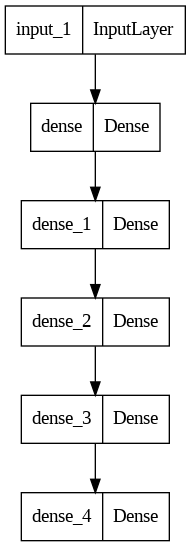

In [11]:
tf.keras.utils.plot_model(model)

In [16]:
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8643
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8663
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8643
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8663
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8623
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8663
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.8623
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3696 - accuracy: 0.8643
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.8663
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8683
Epoch 11/50
16/16 [

In [17]:
history = history.history

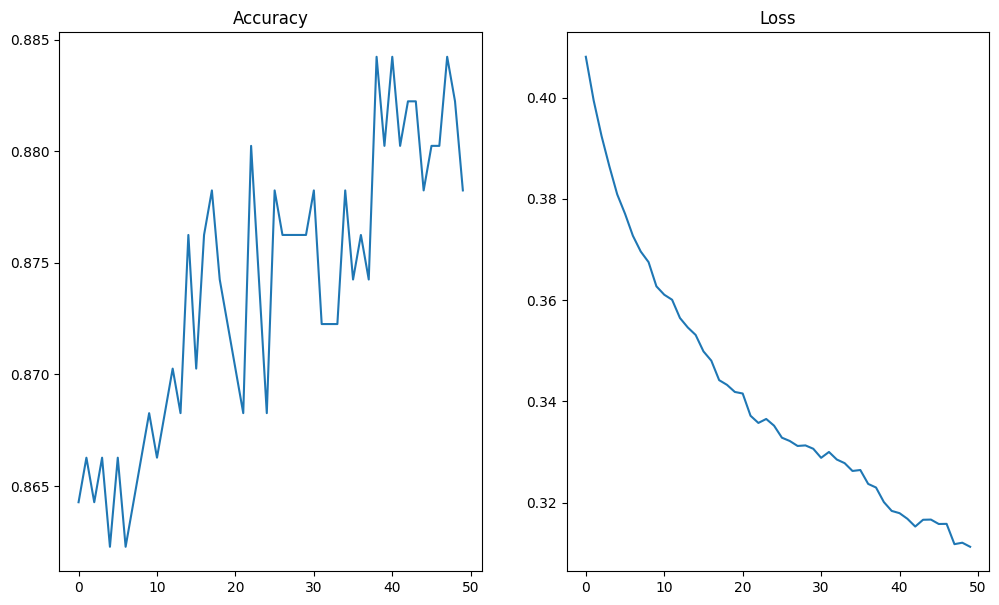

In [18]:
plt.figure(figsize=(12,7))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["accuracy"])

plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"])

plt.show()

In [23]:
loss,accuracy = model.evaluate(X_test,y_test)

print(loss,accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.6176 - accuracy: 0.7540
0.6176391839981079 0.7539682388305664
